In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# Fake dataset with Pandas

In [2]:

N = 1_00_000

category = np.random.randint(0,5,N)


fake = pd.DataFrame({'cat':category})
fake['txt']=fake['cat'].map(dict(zip(range(5),list('abcde'))))
fake

,cat,txt
0,4,e
1,3,d
2,3,d
3,0,a
4,0,a
...,...,...
99995,4,e
99996,4,e
99997,4,e
99998,4,e


In [3]:

def custom_blob(cat_val,N):
    
    return np.random.normal(10*cat_val,1+2*cat_val,1)[0]

def custom_blob2(cat_val):
    return np.random.normal(5*cat_val,1+0.5*cat_val,1)[0]
    
fake['num'] = fake['cat'].apply(custom_blob,args=[N])
fake['num2'] = fake['cat'].apply(custom_blob2)

In [4]:
fake

,cat,txt,num,num2
0,4,e,43.731411,21.728584
1,3,d,37.923746,15.228318
2,3,d,27.567363,14.024540
3,0,a,-0.120756,-1.606580
4,0,a,-1.423459,-0.689614
...,...,...,...,...
99995,4,e,41.592058,14.420481
99996,4,e,44.231608,21.699998
99997,4,e,56.137835,22.219105
99998,4,e,41.194120,21.250911


In [5]:

dict_colors = dict(zip(
        list('abcde')
        ,['red','green','blue', 'purple','cyan']
    ))


fake['colors'] = fake['txt'].map(dict_colors
)

fake

,cat,txt,num,num2,colors
0,4,e,43.731411,21.728584,cyan
1,3,d,37.923746,15.228318,purple
2,3,d,27.567363,14.024540,purple
3,0,a,-0.120756,-1.606580,red
4,0,a,-1.423459,-0.689614,red
...,...,...,...,...,...
99995,4,e,41.592058,14.420481,cyan
99996,4,e,44.231608,21.699998,cyan
99997,4,e,56.137835,22.219105,cyan
99998,4,e,41.194120,21.250911,cyan


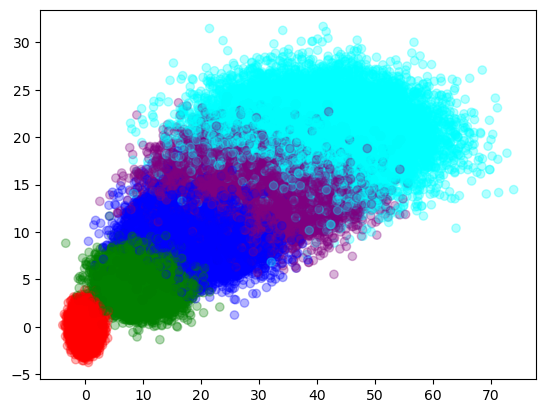

In [6]:
plt.scatter(x=fake['num']
            ,y=fake['num2']
            ,c=fake['colors'].values
            , alpha= 0.3
           )

plt.show()

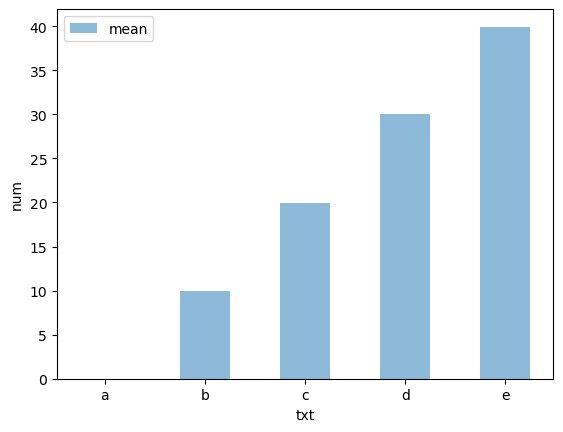

In [7]:
GB = fake.loc[:,['txt','num']].groupby('txt').mean().round(3)


fig,ax = plt.subplots()

plt.bar(x=GB.index,height=GB.num, alpha=0.5, width = 0.5, label='mean')

plt.xlabel('txt')
plt.ylabel('num')

plt.legend()
plt.show()

# Seaborn

https://seaborn.pydata.org/tutorial.html
  
https://seaborn.pydata.org/examples/index.html

In [8]:
import seaborn as sns

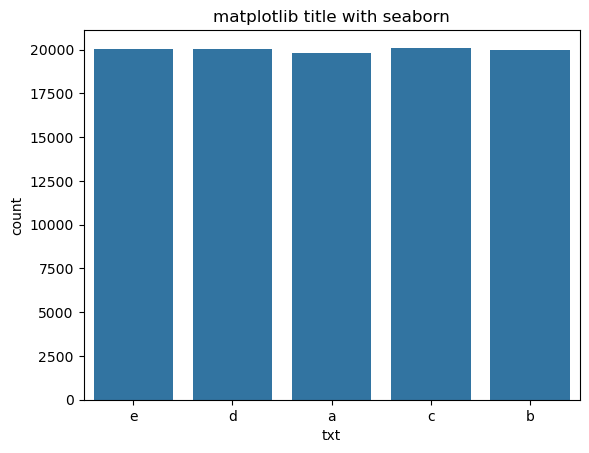

In [9]:
# countplot = barplot + count
sns.countplot(data = fake , x = 'txt') 
# (data = fake, x = fake['txt'])
plt.title("matplotlib title with seaborn")
plt.show()

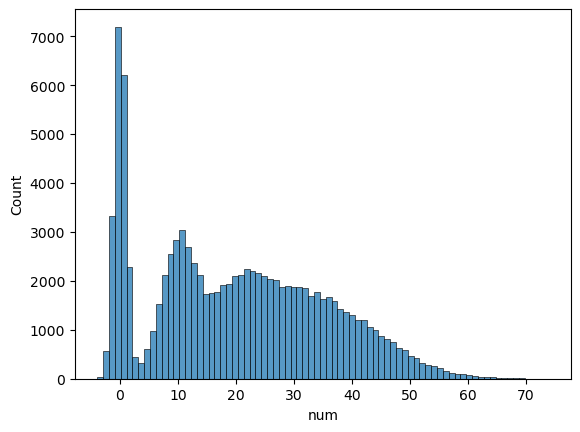

In [10]:
sns.histplot(fake,x = 'num')
plt.show()

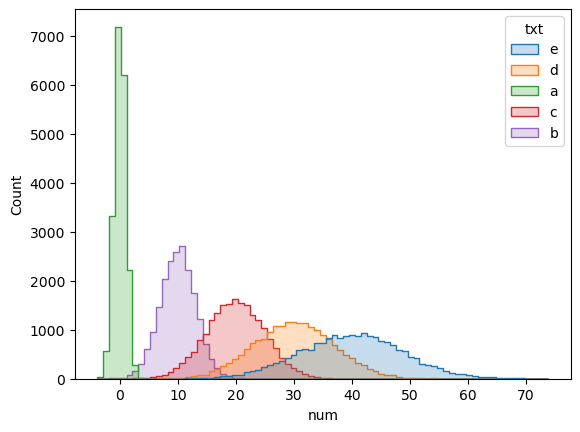

In [11]:
sns.histplot(fake, x= 'num', hue = 'txt', element='step') 
# hue == teinte == couleur
plt.show()

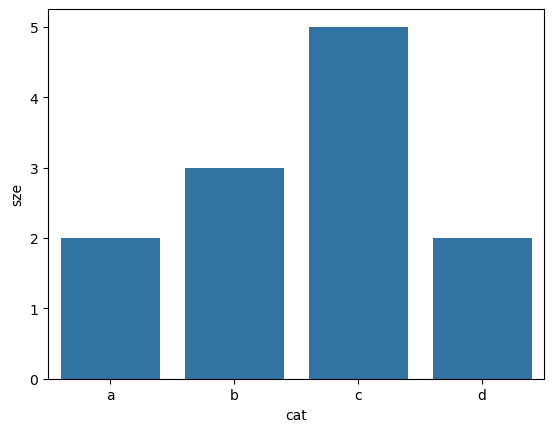

In [12]:
### creation data

cat = list('abcd')
sze = np.random.randint(2,8,4)

GB = pd.DataFrame({"cat":cat,"sze":sze})

sns.barplot(data = GB, x = "cat", y="sze")
plt.show()

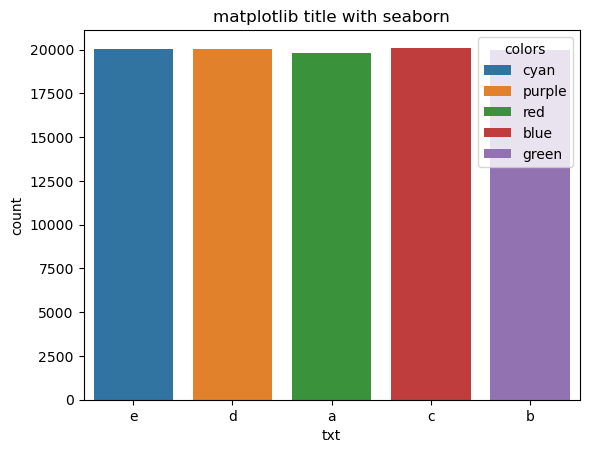

In [19]:
# countplot = barplot + count
sns.countplot(data = fake , x = 'txt', hue = "colors") 
# (data = fake, x = fake['txt'])
plt.title("matplotlib title with seaborn")
plt.show()

In [14]:
fake

,cat,txt,num,num2,colors
0,4,e,43.731411,21.728584,cyan
1,3,d,37.923746,15.228318,purple
2,3,d,27.567363,14.024540,purple
3,0,a,-0.120756,-1.606580,red
4,0,a,-1.423459,-0.689614,red
...,...,...,...,...,...
99995,4,e,41.592058,14.420481,cyan
99996,4,e,44.231608,21.699998,cyan
99997,4,e,56.137835,22.219105,cyan
99998,4,e,41.194120,21.250911,cyan


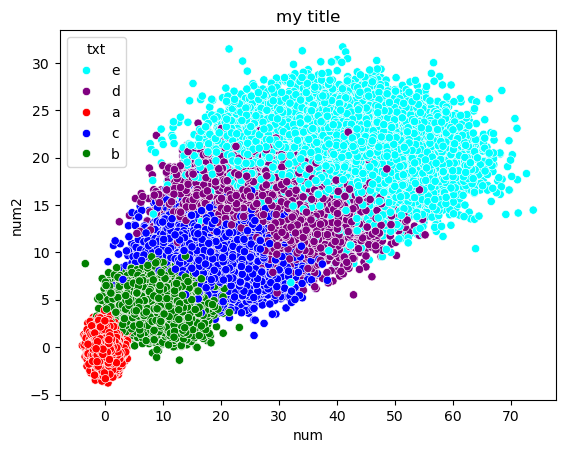

In [15]:

dict_colors = dict(zip(
        list('abcde')
        ,['red','green','blue', 'purple','cyan']
    ))

sns.scatterplot(data = fake
                ,x='num'
                ,y='num2'
                ,hue='txt'
                ,palette=dict_colors
               )
plt.title('my title')
plt.show()

In [16]:
# pas de pie-chart dans seaborn

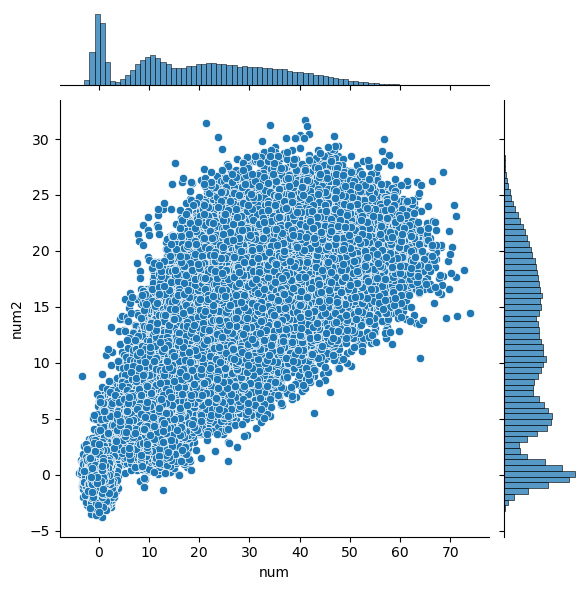

In [23]:
sns.jointplot(data=fake, x= "num",y = "num2")
plt.show()

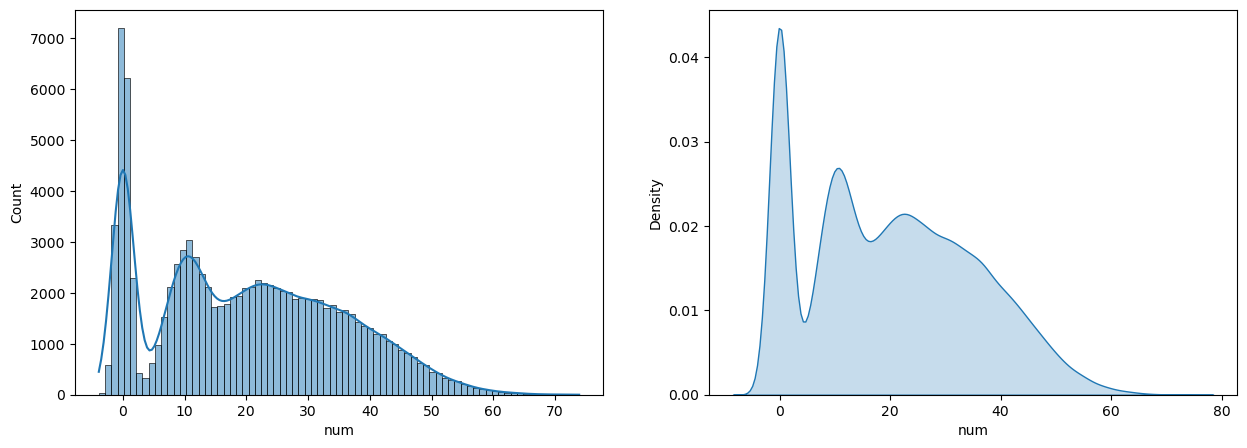

In [32]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

sns.histplot(data=fake,x='num', kde=True)


plt.subplot(1,2,2)

sns.kdeplot(data=fake,x="num",fill=True) ## kernel density estimator = histogramme lissé

plt.show()

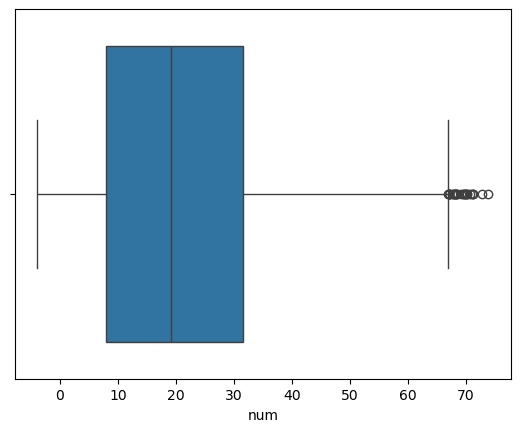

In [27]:
sns.boxplot(data=fake,x='num')
plt.show()

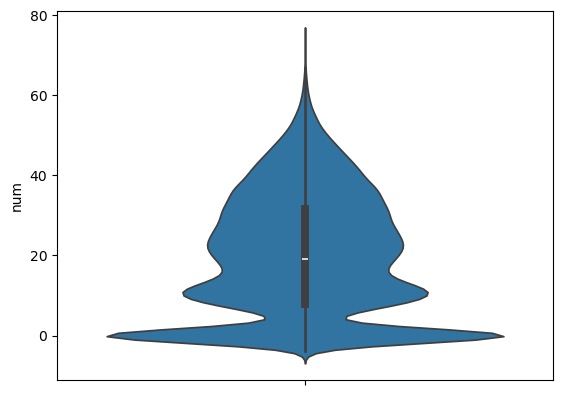

In [25]:
sns.violinplot(data=fake,y="num")
plt.show()